# Laboratorium 8 - PCA, Klasteryzacja

Celem laboratorium jest wykorzystanie gotowych implementacji analizy składowych głównych (PCA) oraz algorytmów związanych z klasteryzacją (k-średnich oraz klasteryzacji spektralnej). Zakładam, że algorytm PCA oraz pojęcie klasteryzacji są znane z wykładu. Jeżeli nie - braki w wiedzy należy uzupełnić.

Tradycyjnie, zacznijmy od importu bibliotek.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sklearn.decomposition as dc
import sklearn.datasets.samples_generator as sg
import sklearn.datasets as ds
import sklearn.cluster as cl

%matplotlib inline

np.random.seed(12345)

Zacznijmy od wygenerowania zbioru do PCA:

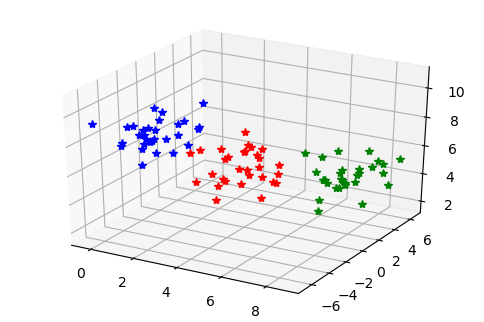

In [4]:
no_points_per_set = 30

x1 = np.random.randn(no_points_per_set, 3) + np.array([5, -3, 7])
x2 = np.random.randn(no_points_per_set, 3) + np.array([2, -5, 9])
x3 = np.random.randn(no_points_per_set, 3) + np.array([7, 5, 4])

X = np.concatenate((x1, x2, x3))
y = np.zeros(X.shape[0])
y[30:60] = 1
y[60:] = 2


fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], X[:, 2][y == 0], "r*")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], X[:, 2][y == 1], "b*")
plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], X[:, 2][y == 2], "g*")
plt.show()

Dokonaj redukcji wymiarowości do dwóch, a następnie jednego wymiaru (korzystając z PCA). Wypisz sumę względnej wariancji po redukcji wymiarowości. Co ona oznacza?

Do czego może być stosowane PCA? Jakie są wady i zalety redukcji wymiarowości?

Przykładowy rezultat:

Total remaing variance 2-D: 0.9585813268107145


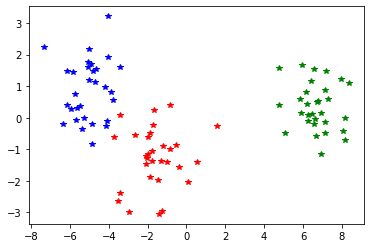

Total remaing variance 1-D: 0.9017429276089326


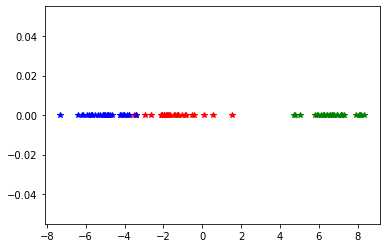

In [5]:
pca = dc.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(X)
print("Total remaing variance 2-D:", sum(pca.explained_variance_ratio_))
plt.plot(pca_data[:, 0][y == 0], pca_data[:, 1][y == 0], "r*")
plt.plot(pca_data[:, 0][y == 1], pca_data[:, 1][y == 1], "b*")
plt.plot(pca_data[:, 0][y == 2], pca_data[:, 1][y == 2], "g*")
plt.show()
pca = dc.PCA()
pca.n_components = 1
pca_data = pca.fit_transform(X)
print("Total remaing variance 1-D:", sum(pca.explained_variance_ratio_))
plt.plot(pca_data[:][y == 0], np.zeros_like(pca_data)[y==0], "r*")
plt.plot(pca_data[:][y == 1], np.zeros_like(pca_data)[y==1],"b*")
plt.plot(pca_data[:][y == 2], np.zeros_like(pca_data)[y==2],"g*")
plt.show()

Następnie przejdźmy do klasteryzacji. Wygenerujmy dwa zbiory pokazujące możliwości różnych algorytmów służących do klasteryzacji.

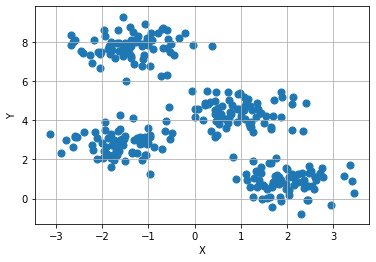

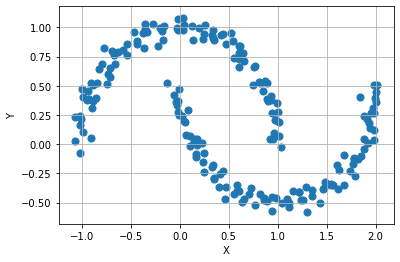

In [6]:
# Zbiory do klasteryzacji
X1, y1_true = sg.make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X2, y2_true = ds.make_moons(200, noise=.05, random_state=0)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], s=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], s=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

Intuicyjnie jesteśmy w stanie określić przynależność danego punktu do danego zbioru. Natomiast, jak liczbowo ocenić jakość klasteryzacji? Czym różni się klasteryzacja od klasyfikacji?

Dokonaj klasteryzacji obu zbiorów korzystając z algorytmów k-średnich oraz klasteryzacji spektralnej z biblioteki sklearn. Skąd biorą się różnice? Wytłumacz działanie obu algorytmów.
Praktyczne informacje dotyczące różnych algorytmów klasteryzacji można znaleźć na: https://scikit-learn.org/stable/modules/clustering.html
Bazując na podanym źródle, wytłumacz główne zalety algorytmu DBSCAN.

Przykładowy rezultat:

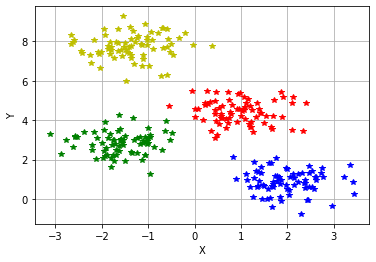

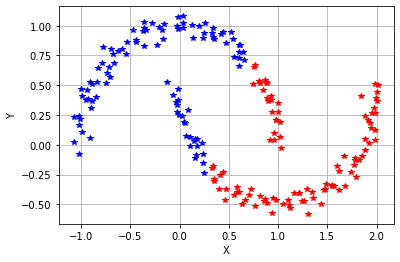

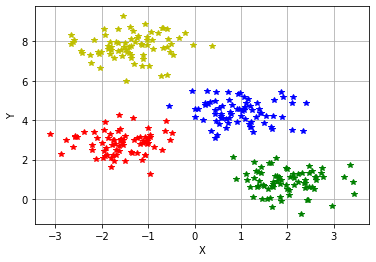

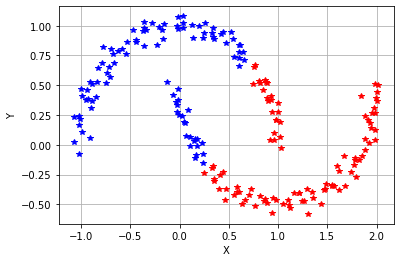

In [7]:
kmeans = cl.KMeans(n_clusters=4, random_state=0).fit(X1)
plt.figure()

plt.plot(X1[:, 0][kmeans.labels_ == 0], X1[:, 1][kmeans.labels_ == 0], "b*")
plt.plot(X1[:, 0][kmeans.labels_ == 1], X1[:, 1][kmeans.labels_ == 1], "r*")
plt.plot(X1[:, 0][kmeans.labels_ == 2], X1[:, 1][kmeans.labels_ == 2], "y*")
plt.plot(X1[:, 0][kmeans.labels_ == 3], X1[:, 1][kmeans.labels_ == 3], "g*")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

kmeans = cl.KMeans(n_clusters=2, random_state=0).fit(X2)
plt.figure()

plt.plot(X2[:, 0][kmeans.labels_ == 0], X2[:, 1][kmeans.labels_ == 0], "b*")
plt.plot(X2[:, 0][kmeans.labels_ == 1], X2[:, 1][kmeans.labels_ == 1], "r*")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

clustering = cl.SpectralClustering(n_clusters=4, random_state=0).fit(X1)
plt.figure()

plt.plot(X1[:, 0][clustering.labels_ == 0], X1[:, 1][clustering.labels_ == 0], "b*")
plt.plot(X1[:, 0][clustering.labels_ == 1], X1[:, 1][clustering.labels_ == 1], "r*")
plt.plot(X1[:, 0][clustering.labels_ == 2], X1[:, 1][clustering.labels_ == 2], "y*")
plt.plot(X1[:, 0][clustering.labels_ == 3], X1[:, 1][clustering.labels_ == 3], "g*")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

clustering = cl.SpectralClustering(n_clusters=2, random_state=0).fit(X2)
plt.figure()

plt.plot(X2[:, 0][clustering.labels_ == 0], X2[:, 1][clustering.labels_ == 0], "b*")
plt.plot(X2[:, 0][clustering.labels_ == 1], X2[:, 1][clustering.labels_ == 1], "r*")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()